# TEMAS:
## TEMA 7. Tratamiento del Balanceo de datos
## TEMA 8. Discretización de datos

In [1]:
from IPython.display import Image
%matplotlib inline

Información o «dataset» con múltiples clases es entendida como desbalanceada cuando las clases minoritarias están sub-representadas en oposición a la clase mayoritaria.

link: https://imbalanced-learn.readthedocs.io/en/stable/

## TEMA 7. Tratamiento del Balanceo de datos

**Problemática:**
- Los algoritmos de clasificación funcionan pobremente en la clase minoritaria.
- El costo de mala clasificación en dicha clase suele ser mucho mayor que el resto.
- En muchos dominios del mundo real existe una clase dentro de la variable de estudio o target la cual acumula la gran mayoría de elementos.

**Estrategias de balanceo:**

Existen en la literatura muchas maneras o metodologías para balancear o equilibrar las clases, cada una dependiendo de la proporción de elementos en cada una de las clases y del tipo de problema que uno está abordando. Entre las más usadas y estudiadas tenemos:

- UnderSampling
- OverSamplig
- SMOTE
- Resampling

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
# imbalanced-learn requiere los siguientes paquetes:
import numpy as np
import scipy
import sklearn
import imblearn
#import tensorflow #(opcional)
#import keras #requiere instalar tensorflow (opcional)

In [5]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import train_test_split  #Para particionar los datos en training y testing

In [6]:
os.getcwd() #esto te permite conocer el directorio actual

'C:\\Users\\user'

In [7]:
os.chdir(r"E:\PYTHOM\MODULO 1\CLASE 4") # la ruta absoluta
#una vez ubicado en el directorio adecuado puedes ejecutar el comando 

In [8]:
fileCSV="Grid v1.csv"
entel=pd.read_csv(fileCSV,sep=",")
entel.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Description,Col_Name,Row_Name,rsrp,incidentes,redireccion,best_server,cqi
0,A1,A,1,0.0,0,0.0,NaN,0.0
1,A2,A,2,0.0,0,0.0,NaN,0.0
2,A3,A,3,0.0,0,0.0,NaN,0.0
3,A4,A,4,0.0,0,0.0,NaN,0.0
4,A5,A,5,0.0,0,0.0,NaN,0.0


In [9]:
#Veamos la dimensión de mi Data Frame
print(entel.shape)

(197640, 8)


In [10]:
#Sólo consideramos los valores menores a cero de la variable rsrp
entel=entel.loc[entel['rsrp']<0]
print(entel.shape)

(23103, 8)


In [11]:
#Frecuencia por Número de Incidentes antes de recodificación
pd.value_counts(entel.incidentes,sort=True)

0    21601
1     1279
2      167
3       41
4       11
6        2
7        1
5        1
Name: incidentes, dtype: int64

In [12]:
#Recodificando la target
entel['incidentes']=entel['incidentes'].replace([2,3,4,5,6,7],1)

In [13]:
#Frecuencia por Número de Incidentes después de recodificación
incidentes_freq=pd.value_counts(entel.incidentes,sort=True)
incidentes_freq

0    21601
1     1502
Name: incidentes, dtype: int64

In [14]:
#Cifras Referenciales
incidentes_freq*100/sum(incidentes_freq)

0    93.49868
1     6.50132
Name: incidentes, dtype: float64

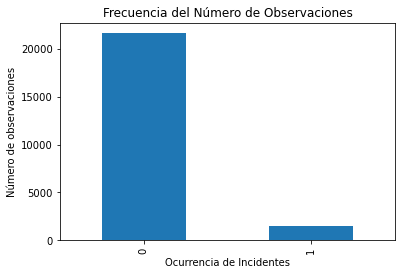

In [15]:
#Graficando la proporción en la variable Target
pd.value_counts(entel.incidentes).plot(kind='bar')
plt.title("Frecuencia del Número de Observaciones")
plt.xlabel("Ocurrencia de Incidentes")
plt.ylabel("Número de observaciones")
plt.show()

In [16]:
#Extrayendo sólo variables de interés
entel=entel[["rsrp","redireccion","cqi","incidentes"]]
entel.head()

,rsrp,redireccion,cqi,incidentes
14400,-115.7500,884.696988,10.856694,0
14949,-112.7500,381.359613,11.205094,0
15498,-118.3750,713.387431,8.729160,0
16046,-115.3750,307.311721,9.607077,0
16596,-118.1875,1728.576707,9.835512,0


In [17]:
entel.reset_index(drop=True,inplace=True)
entel.head()

,rsrp,redireccion,cqi,incidentes
0,-115.7500,884.696988,10.856694,0
1,-112.7500,381.359613,11.205094,0
2,-118.3750,713.387431,8.729160,0
3,-115.3750,307.311721,9.607077,0
4,-118.1875,1728.576707,9.835512,0


In [78]:
entel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23103 entries, 0 to 23102
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rsrp         23103 non-null  float64
 1   redireccion  23103 non-null  float64
 2   cqi          23103 non-null  float64
 3   incidentes   23103 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 722.1 KB


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
#Necesitamos identificar la matriz de datos x y la variable target y.
x = entel.iloc[:, 0:3].values
y = entel.iloc[:, 3].values

#Dividimos un conjunto de prueba y de testeo en 70%,30%
xtrain, xtest, ytrain, ytest =\
    train_test_split(x, #valores de los predictores
                     y, #los valores del target
                     test_size=0.3, #proporción para datos de testeo
                     random_state=0, #semilla
                     stratify=y) #la variable de estratificación

In [20]:
type(x), type(y)

(numpy.ndarray, numpy.ndarray)

In [21]:
#Datos de entrenamiento
xtrain= pd.DataFrame(xtrain, columns=["rsrp", "redireccion", "cqi"])
ytrain= pd.DataFrame(ytrain, columns=["incidentes"])

entel_entrenamiento = pd.concat([xtrain, ytrain], axis=1)
entel_entrenamiento.head()

,rsrp,redireccion,cqi,incidentes
0,-118.7500,11229.222100,7.420288,0
1,-109.3750,4810.049775,8.735570,0
2,-118.5625,14817.830880,7.855299,0
3,-111.4375,374.690909,8.024744,0
4,-105.0625,771.971040,11.067591,0


In [22]:
count_classes = pd.value_counts(entel_entrenamiento['incidentes'], sort = True)
count_classes

0    15121
1     1051
Name: incidentes, dtype: int64

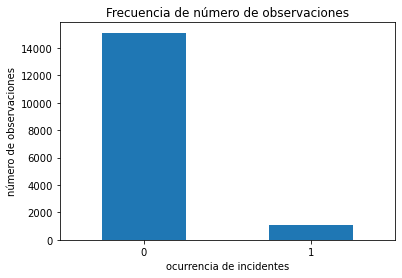

In [23]:
count_classes.plot(kind = 'bar', #bar: gráfico de barras.
                   rot=0)#0 = no rotación de las etiquetas del eje x.
plt.title("Frecuencia de número de observaciones")
plt.xlabel("ocurrencia de incidentes")
plt.ylabel("número de observaciones")
plt.show()

In [24]:
entel_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16172 entries, 0 to 16171
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rsrp         16172 non-null  float64
 1   redireccion  16172 non-null  float64
 2   cqi          16172 non-null  float64
 3   incidentes   16172 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 505.5 KB


## UnderSampling

Registros de la clase mayoritaria en el conjunto de entrenamiento se eliminan al azar hasta que la relación o proporción entre la clase minoritaria y mayoritaria se encuentre en el nivel deseado.

**Desventaja:** podrían eliminarse ejemplos potencialmente importantes para el proceso de modelado o aprendizaje .

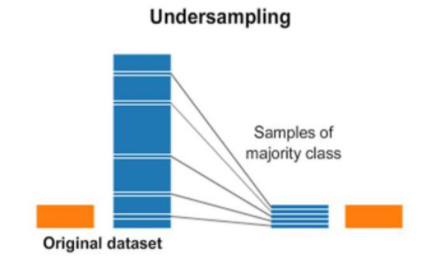

In [25]:
Image(filename='E:\PYTHOM\MODULO 1\CLASE 5/Captura de pantalla 2021-02-26 131531.png', width=400) 

In [26]:
#PRIMERO CREAMOS UNA INSTANCIA DE LA CLASE NearMiss
under = NearMiss(sampling_strategy=0.8, 
                n_neighbors=11, 
                version=2) 

In [27]:
type(under)

imblearn.under_sampling._prototype_selection._nearmiss.NearMiss

In [28]:
xtrain_under,ytrain_under=under.fit_resample(xtrain,ytrain)

In [29]:
entel_entrenamiento_under=pd.concat([xtrain_under,ytrain_under],axis=1)
entel_entrenamiento_under.head()

,rsrp,redireccion,cqi,incidentes
0,-117.6250,72933.99877,8.991336,0
1,-112.1875,72922.84746,8.859823,0
2,-115.3750,73340.52754,9.920042,0
3,-112.9375,72782.29383,7.530053,0
4,-113.3125,72578.28974,8.988408,0


In [30]:
count_classes_under = pd.value_counts(entel_entrenamiento_under['incidentes'], sort = True)
count_classes_under

0    1313
1    1051
Name: incidentes, dtype: int64

In [31]:
prop=round(count_classes_under[1]*100/count_classes_under[0],1)
prop

80.0

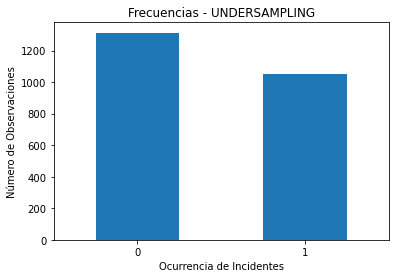

In [32]:
count_classes_under.plot(kind='bar',rot=0)
plt.title("Frecuencias - UNDERSAMPLING")
plt.xlabel("Ocurrencia de Incidentes")
plt.ylabel("Número de Observaciones")
plt.show()

## OverSampling

Registros de la clase minoritaria en el conjunto de entrenamiento se replican o clonan al azar hasta que la relación o proporción entre la clase minoritaria y mayoritaria se encuentre en el nivel deseado.

**desventaja:** podría generarse sobre-estimación o sub-estimación dependiendo de la aleatoriedad y es muy costoso computacionalmente.

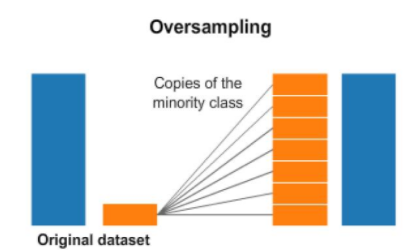

In [33]:
Image(filename='E:\PYTHOM\MODULO 1\CLASE 5/Captura de pantalla 2021-02-26 131608.png', width=400)

In [34]:
#Primero creamos una instancia de la clase RandomOverSampler
over=RandomOverSampler(sampling_strategy=0.8,
                       random_state=2020)

In [35]:
type(over)

imblearn.over_sampling._random_over_sampler.RandomOverSampler

In [36]:
xtrain_over,ytrain_over=over.fit_resample(xtrain,ytrain)

In [37]:
entel_entrenamiento_over=pd.concat([xtrain_over,ytrain_over],axis=1)
entel_entrenamiento_over.head()

,rsrp,redireccion,cqi,incidentes
0,-118.7500,11229.222100,7.420288,0
1,-109.3750,4810.049775,8.735570,0
2,-118.5625,14817.830880,7.855299,0
3,-111.4375,374.690909,8.024744,0
4,-105.0625,771.971040,11.067591,0


In [38]:
count_classes_over = pd.value_counts(entel_entrenamiento_over['incidentes'], sort = True)
count_classes_over

0    15121
1    12096
Name: incidentes, dtype: int64

In [39]:
prop=round(count_classes_over[1]*100/count_classes_over[0],1)
prop

80.0

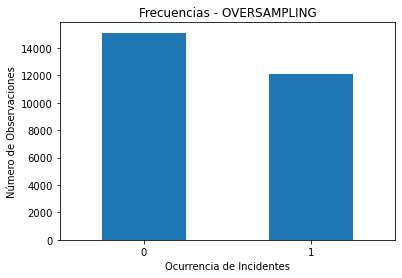

In [40]:
count_classes_over.plot(kind='bar',rot=0)
plt.title("Frecuencias - OVERSAMPLING")
plt.xlabel("Ocurrencia de Incidentes")
plt.ylabel("Número de Observaciones")
plt.show()

## SMOTE-Tomek

técnica muy usada que consiste en aplicar en simultáneo un algoritmo de **UnderSampling** y otro de **OverSampling** a la vez al dataset. Se utilizará **SMOTE** **(Syntetic Minority Oversamplig
Technique)** para oversampling: busca puntos vecinos cercanos y agrega puntos «en linea recta» entre ellos. Y usaremos **Tomek** para undersampling que quita los de distinta clase que sean vecinos más cercanos y deja ver mejor la decisión boundary (la zona limítrofe de nuestras clases).

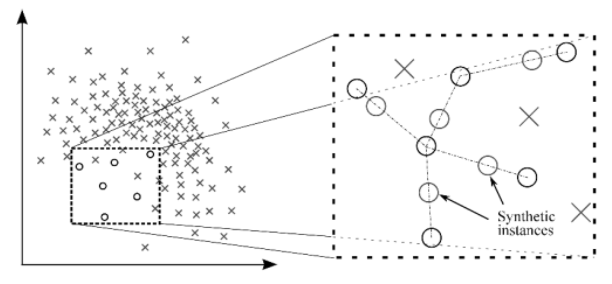

In [41]:
Image(filename='E:\PYTHOM\MODULO 1\CLASE 5/Captura de pantalla 2021-02-26 131629.png', width=400)

In [42]:
#Primero creamos una instancia de la clase SMOTETomek
st=SMOTETomek(sampling_strategy=0.8,
              random_state=2020)

In [43]:
type(st)

imblearn.combine._smote_tomek.SMOTETomek

In [44]:
xtrain_st,ytrain_st=st.fit_resample(xtrain,ytrain)

In [45]:
entel_entrenamiento_st=pd.concat([xtrain_st,ytrain_st],axis=1)
entel_entrenamiento_st.head()

,rsrp,redireccion,cqi,incidentes
0,-118.7500,11229.222100,7.420288,0
1,-109.3750,4810.049775,8.735570,0
2,-118.5625,14817.830880,7.855299,0
3,-111.4375,374.690909,8.024744,0
4,-105.0625,771.971040,11.067591,0


In [46]:
count_classes_st = pd.value_counts(entel_entrenamiento_st['incidentes'], sort = True)
count_classes_st

0    13403
1    10378
Name: incidentes, dtype: int64

In [47]:
prop=round(count_classes_st[1]*100/count_classes_st[0],1)
prop

77.4

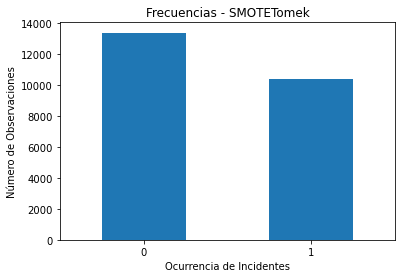

In [48]:
count_classes_st.plot(kind='bar',rot=0)
plt.title("Frecuencias - SMOTETomek")
plt.xlabel("Ocurrencia de Incidentes")
plt.ylabel("Número de Observaciones")
plt.show()

## TEMA 8: DESCRETIZACIÓN DE DATOS

In [49]:
#Importando librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math
from sklearn.preprocessing import KBinsDiscretizer

### Descretización por intervalos de igual amplitud

In [50]:
os.chdir("E:\PYTHOM\MODULO 1\CLASE 5")

In [51]:
#importamos el archivo csv
fichero_csv="data.csv"#Creamos el objeto para llamar a mi archivo csv
data=pd.read_csv(fichero_csv,#lo ponemos en tablas(DataFrame)
              sep=",",
              encoding="ISO-8859-1")
data.head()

,genero,est_civil,tpers,cal,edad,clase
0,1,3,0,0,40,1
1,1,3,0,3,35,1
2,1,0,0,3,58,1
3,1,3,0,1,44,0
4,1,3,0,0,65,1


In [52]:
n=len(data)
k=1+math.log2(n)
k=round(k,0)
k

15.0

In [53]:
amplitud=KBinsDiscretizer(n_bins=15,
                         encode="ordinal",
                         strategy="uniform")

In [54]:
nuevo=amplitud.fit_transform(data[['edad']])

In [55]:
data["edad_amplitud"]=nuevo
data["edad_amplitud"]=data["edad_amplitud"].astype(np.int64)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19375 entries, 0 to 19374
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   genero         19375 non-null  int64
 1   est_civil      19375 non-null  int64
 2   tpers          19375 non-null  int64
 3   cal            19375 non-null  int64
 4   edad           19375 non-null  int64
 5   clase          19375 non-null  int64
 6   edad_amplitud  19375 non-null  int64
dtypes: int64(7)
memory usage: 1.0 MB


In [56]:
data.groupby(data.edad_amplitud).size()

edad_amplitud
0      272
1      357
2      259
3      316
4     1914
5     2933
6     3499
7     3226
8     2532
9     2013
10    1102
11     727
12     162
13      50
14      13
dtype: int64

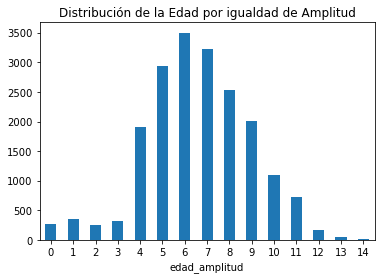

In [57]:
data.groupby(data.edad_amplitud).size().plot(kind="bar", rot=0)
plt.title("Distribución de la Edad por igualdad de Amplitud")
plt.show()

### Discretización por Cuantiles

In [58]:
amplitud=KBinsDiscretizer(n_bins=4,
                         encode="ordinal",#codificamos como entero
                         strategy="quantile")#quantile por ser intervalos por cuantiles

In [59]:
nuevo_cuantil=amplitud.fit_transform(data[['edad']])

In [60]:
data["edad_cuantil"]=nuevo_cuantil
data["edad_cuantil"]=data["edad_cuantil"].astype(np.int64)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19375 entries, 0 to 19374
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   genero         19375 non-null  int64
 1   est_civil      19375 non-null  int64
 2   tpers          19375 non-null  int64
 3   cal            19375 non-null  int64
 4   edad           19375 non-null  int64
 5   clase          19375 non-null  int64
 6   edad_amplitud  19375 non-null  int64
 7   edad_cuantil   19375 non-null  int64
dtypes: int64(8)
memory usage: 1.2 MB


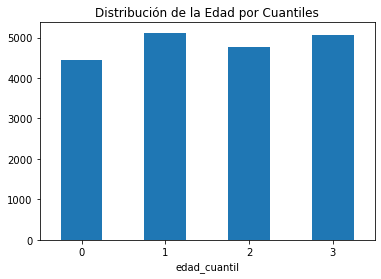

In [61]:
data.groupby(data.edad_cuantil).size().plot(kind="bar", rot=0)
plt.title("Distribución de la Edad por Cuantiles")
plt.show()

### Discretización por KMeans

In [62]:
amplitud=KBinsDiscretizer(n_bins=4,#Pra efecto practico se considera 4 clases
                         encode="ordinal",#codificamos como entero
                         strategy="kmeans")#quantile por ser intervalos por cuantiles

In [63]:
nuevo_kmeans=amplitud.fit_transform(data[['edad']])

In [64]:
data["edad_kmeans"]=nuevo_kmeans
data["edad_kmeans"]=data["edad_kmeans"].astype(np.int64)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19375 entries, 0 to 19374
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   genero         19375 non-null  int64
 1   est_civil      19375 non-null  int64
 2   tpers          19375 non-null  int64
 3   cal            19375 non-null  int64
 4   edad           19375 non-null  int64
 5   clase          19375 non-null  int64
 6   edad_amplitud  19375 non-null  int64
 7   edad_cuantil   19375 non-null  int64
 8   edad_kmeans    19375 non-null  int64
dtypes: int64(9)
memory usage: 1.3 MB


In [65]:
data.groupby(data.edad_kmeans).size()

edad_kmeans
0     942
1    7410
2    7341
3    3682
dtype: int64

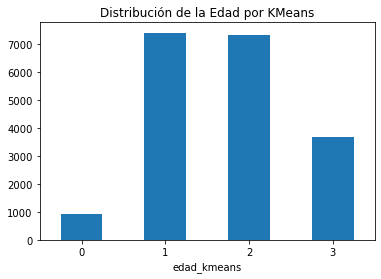

In [66]:
data.groupby(data.edad_kmeans).size().plot(kind="bar", rot=0)
plt.title("Distribución de la Edad por KMeans")
plt.show()

### Discretización por Entropia

In [67]:
#Conocida por Discretización por arboles o Discretización Tree

In [68]:
from MDLP import MDLP_Discretizer

In [69]:
data.columns

Index(['genero', 'est_civil', 'tpers', 'cal', 'edad', 'clase', 'edad_amplitud',
       'edad_cuantil', 'edad_kmeans'],
      dtype='object')

In [70]:
x=data.iloc[:,0:5].values
y=data.iloc[:,data.columns=='clase'].values

In [71]:
var=[4]
n_predictores=np.array(var)
n_predictores

array([4])

In [72]:
#Creamos una instancia de clase MDLP_Discretizer
discretizer=MDLP_Discretizer(features=n_predictores)

In [73]:
#Entrenamos los datos
discretizer.fit(x,y)

In [74]:
#Transformo los datos(Discretización)
x_discretizados=discretizer.transform(x)
x_discretizados

array([[1, 3, 0, 0, 5],
       [1, 3, 0, 3, 5],
       [1, 0, 0, 3, 8],
       ...,
       [2, 2, 1, 4, 5],
       [1, 0, 0, 1, 5],
       [1, 0, 0, 1, 5]], dtype=int64)

In [75]:
edad_entropia=x_discretizados[:,4]
data["edad_entropia"]=edad_entropia
data.head()

,genero,est_civil,tpers,cal,edad,clase,edad_amplitud,edad_cuantil,edad_kmeans,edad_entropia
0,1,3,0,0,40,1,6,1,2,5
1,1,3,0,3,35,1,5,1,1,5
2,1,0,0,3,58,1,9,3,3,8
3,1,3,0,1,44,0,7,2,2,5
4,1,3,0,0,65,1,10,3,3,9


In [76]:
print("Los puntos de corte para la Discretización")
print(discretizer._cuts)

Los puntos de corte para la Discretización
{4: [4.5, 7.5, 10.5, 12.5, 17.5, 51.5, 52.5, 53.5, 61.5, 66.5, 68.5, 77.5]}


In [77]:
print("Los intervalos para la Discretización")
print(discretizer._bin_descriptions[4])

Los intervalos para la Discretización
{0: '-inf_to_4.5', 1: '4.5_to_7.5', 2: '7.5_to_10.5', 3: '10.5_to_12.5', 4: '12.5_to_17.5', 5: '17.5_to_51.5', 6: '51.5_to_52.5', 7: '52.5_to_53.5', 8: '53.5_to_61.5', 9: '61.5_to_66.5', 10: '66.5_to_68.5', 11: '68.5_to_77.5', 12: '77.5_to_inf'}
